In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread("mandrill_colour.png")

In [3]:
print(img.shape)

(288, 288, 3)


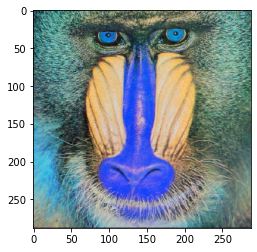

In [4]:
plt.imshow(img)

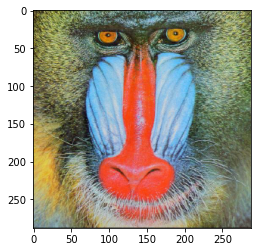

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Create a black imgage which will act as a lemplate

In [6]:
image_blank = np.zeros(shape = (512, 512, 3), dtype = np.int16)

# Display the black image.

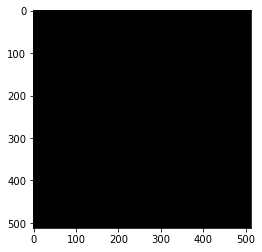

In [7]:
plt.imshow(image_blank)

# Fx and Attribites
```cv2.shape(line, rectangle etc)(image, pt1, pt2, color, thickness)```

There are some common arguments which are passed in function to draw shapes on images:

* Image on which shapes are to be drawn
* co-ordinates of the shape to be drawn from Pt1(top left) to Pt2(bottom right)
* ***Color***: The color of the shape that is to be drawn. It is passed as a tuple, eg: (255,0,0). For grayscale, it will be the scale of brightness.
* The thickness of the geometrical figure.

# Straight Line
Drawing a straight line across an image

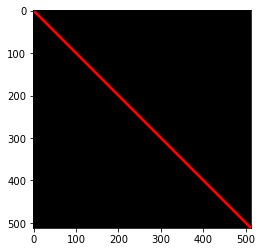

In [8]:
# Draw a diagonal red line with thickness of 5 px
line_red = cv2.line(image_blank,(0,0),(511,511),(255,0,0),5)
plt.imshow(line_red)

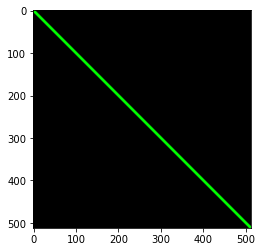

In [9]:
# Draw a diagonal green line with thickness of 5 px
line_green = cv2.line(image_blank, (0,0), (511, 511), (0, 255, 0), 5)
plt.imshow(line_green)

# Ractangle
top left and the bottom right coordinates

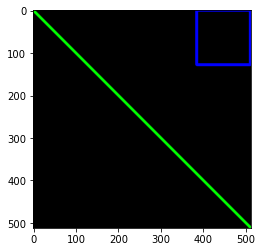

In [10]:
# Draw a blue ractangle with a thickness of 5 px
rectangle = cv2.rectangle(image_blank, (384, 0), (510, 128), (0, 0, 255), 5)
plt.imshow(rectangle)

# Circle
center coordinates and radius value

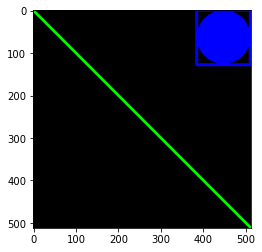

In [11]:
# -1 correspods to a filled circle
circle = cv2.circle(image_blank, (447, 63), 63, (0, 0, 255), -1)
plt.imshow(circle)

# Writing on Images

Adding text to images is also similar to drawing on them. But you need to specity certain arguments before doing so:

* Text to be written
* Coordinates of the text. The text on an image beins from the bottom left direction.
* Font type and scale
* Other attributes like color, thickness and line type. Normally the line type that is used is ```lineType =cv2.LINE_AA```

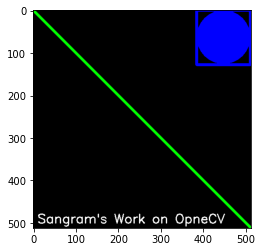

In [12]:
font = cv2.FONT_HERSHEY_SIMPLEX
text = cv2.putText(image_blank, "Sangram's Work on OpneCV", (10, 500), font, 1,(255, 255, 255), 2, cv2.LINE_AA)
plt.imshow(text)

# Face Detection

Loading the image to be tested in grayscale

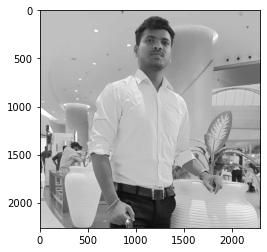

In [13]:
#Loading the image to be tested
test_img = cv2.imread("Sangram.jpg")

# Converting to grayscale
test_img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

# Displaying the grayscale image
plt.imshow(test_img_gray, cmap='gray')

### OpneCV loads an image in BGR format, so we need to convert it into RGB format to be able to display colors.

In [14]:
# Define a fx for that

def convertToRGB(image):
    #return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image[:,:,::-1]

haar_cascade_face = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")

In [15]:
haar_cascade_face = cv2.CascadeClassifier("haarcascades/haarcascade_frontalface_default.xml")

In [16]:
faces_rects = haar_cascade_face.detectMultiScale(test_img_gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


We will be drawing a green rectangle with a thickness of 2

In [17]:
for (x, y, w, h) in faces_rects:
    cv2.rectangle(test_img, (x, y), (x+w, y+h), (0, 255, 0), 2)

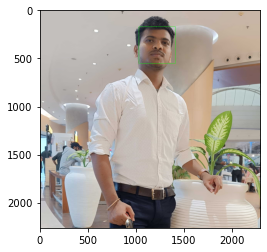

In [18]:
# Convert image to RGB and show image

plt.imshow(convertToRGB(test_img))

# Face Detection with generalized fx

In [19]:
def detect_faces(cascade, test_img, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    img_copy = test_img.copy()
    # convert the test image to gray scale as opencv face detector expects gray images
    gray_img = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_img, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 10)
        return img_copy

# Testing the function on new Image

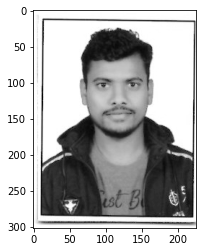

In [20]:
# Loading Image
test_img2 = cv2.imread('Saangram_.jpg')

# converting to grayscale
test_img_gray = cv2.cvtColor(test_img2, cv2.COLOR_BGR2GRAY)

# Displaying the image
plt.imshow(test_img_gray, cmap="gray")

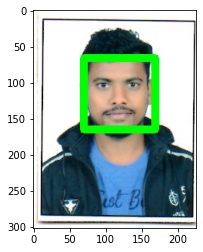

In [21]:
# Call the function to detect faces
faces = detect_faces(haar_cascade_face, test_img2)
# convert to rgb and display image
plt.imshow(convertToRGB(faces))

# Testing the fx on a group image

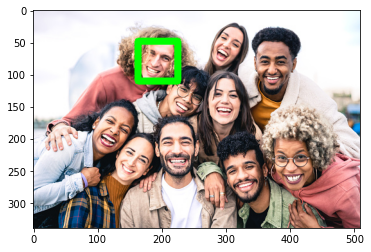

In [22]:
# Loading image
test_image2 = cv2.imread("test_image.jpg")

# call the fx to detect faces

faces = detect_faces(haar_cascade_face, test_image2)

# convert to RGB an display image

plt.imshow(faces[:,:,::-1])